In [1]:
from ionChain import *
%load_ext autoreload
%autoreload 2


In [2]:
cut_off=10
N=2
ic = ionChain(2, omega_d=927e4, cut_off=cut_off)

In [3]:
j1, j2 = 0 ,1
theta=np.pi/3
T=3e-4
Nseg=9

U=ideal_ms(theta)
psi =U*tensor(basis(2, 0), basis(2, 0))
ideal = psi * psi.dag()


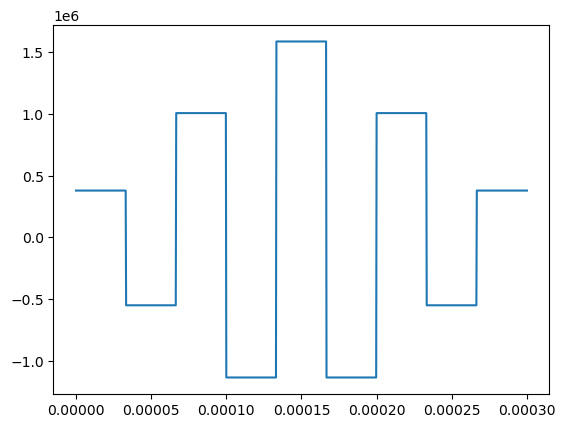

In [4]:
amp0 = ic.optimize_amp(j1, j2, theta, T, Nseg, True)
amp_plot(amp0, Nseg, T)
# Rabi frequency in [Hz]

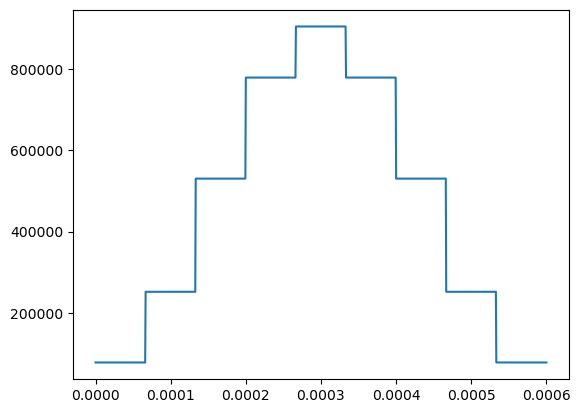

In [5]:
amp1 = ic.optimize_amp(j1, j2, -theta, 2*T, Nseg, True)
amp_plot(amp1, Nseg, 2*T)
# Rabi frequency in [Hz]

100%|██████████| 21/21 [01:33<00:00,  4.47s/it]


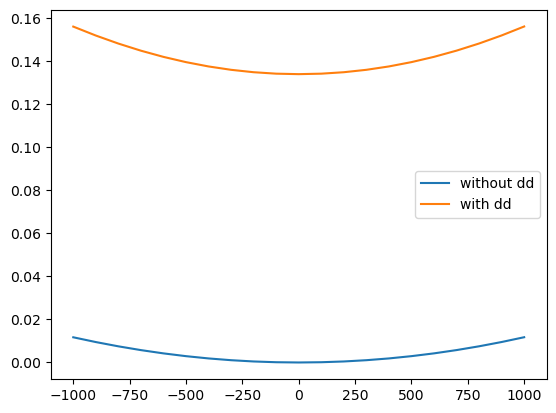

In [9]:
from tqdm import tqdm
yy=tensor(tensor(sigmay(), sigmay()), tensor([qeye(cut_off)]*N))

infid=[]
infid_dd=[]

ad_list=np.linspace(-1e3, 1e3, 21)
for ad in tqdm(ad_list):
    psi=ic.simulate(j1, j2, amp0, T, Nseg, ad, 0)
    psi_dd=ic.simulate(j1, j2, amp1, 2*T, Nseg, ad, 0, yy*psi)
    psi_dd=ic.simulate(j1, j2, amp0, T, Nseg, ad, 0, yy*psi)
    infid.append(1-qutip.fidelity(ideal, psi.ptrace([0, 1])))
    infid_dd.append(1-qutip.fidelity(ideal, psi_dd.ptrace([0, 1])))

plt.plot(ad_list, infid, label="without dd")
plt.plot(ad_list, infid_dd, label="with dd")
plt.legend()


In [6]:
ideal

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.25+0.j        0.  +0.j        0.  +0.j        0.  -0.4330127j]
 [0.  +0.j        0.  +0.j        0.  +0.j        0.  +0.j       ]
 [0.  +0.j        0.  +0.j        0.  +0.j        0.  +0.j       ]
 [0.  +0.4330127j 0.  +0.j        0.  +0.j        0.75+0.j       ]]

In [7]:
ad=1e3
sigmaz1=tensor(sigmaz(), qeye(2))
sigmaz2=tensor(qeye(2), sigmaz())
sigmax1=tensor(sigmax(), qeye(2))
sigmax2=tensor(qeye(2), sigmax())
sigmay1=tensor(sigmay(), qeye(2))
zz = tensor(sigmaz(), sigmaz())
sigmay2=tensor(qeye(2), sigmay())
U=(1j*theta*tensor(sigmax(), qeye(2))*tensor(qeye(2), sigmax())-1j/2*ad*T*(sigmaz1+sigmaz2)).expm()
theory=U*tensor(basis(2, 0), basis(2, 0))

theory=theory*theory.dag()
theory

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.27402942+0.j         0.        +0.j         0.        +0.j
  -0.20797525-0.3945676j]
 [ 0.        +0.j         0.        +0.j         0.        +0.j
   0.        +0.j       ]
 [ 0.        +0.j         0.        +0.j         0.        +0.j
   0.        +0.j       ]
 [-0.20797525+0.3945676j  0.        +0.j         0.        +0.j
   0.72597058+0.j       ]]

In [11]:
qutip.fidelity(theory, ideal)

0.9770828295746413

In [87]:
np.log(theory[3, 0] / rho[3, 0])/1j/2/np.pi/ad/T, np.log(theory[3, 0]/ideal[3, 0])/1j

((-0.050728979610563184-0.0005846498150392037j),
 (0.24664201588189244-0.007925559505027263j))

In [12]:
res=ic.simulate_schrodinger(j1, j2, amp0, T, Nseg, ad)
res.states[-1].ptrace([0, 1])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 9.99917589e-01-2.63837224e-18j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  2.67599168e-03+8.67369263e-03j]
 [ 0.00000000e+00+0.00000000e+00j  5.17634070e-09-6.02501080e-26j
  -1.08490635e-09+2.75057693e-27j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.08490635e-09+2.75057693e-27j
   5.17634070e-09-6.02501080e-26j  0.00000000e+00+0.00000000e+00j]
 [ 2.67599168e-03-8.67369263e-03j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  8.24006661e-05+4.10514203e-22j]]

In [14]:
psi=ic.simulate_interaction(j1, j2, amp0, T, Nseg, ad)
rho=psi.ptrace([0, 1])
rho

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.55961637e-01-3.68723044e-18j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -1.46322991e-01-4.10689594e-01j]
 [ 0.00000000e+00+0.00000000e+00j  6.79766510e-04+1.00580396e-21j
  -6.78384761e-04-1.68966506e-17j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -6.78384761e-04+1.68977470e-17j
   6.79766510e-04+1.28919575e-21j  0.00000000e+00+0.00000000e+00j]
 [-1.46322991e-01+4.10689594e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  7.42678830e-01-6.43478648e-18j]]

In [13]:
qutip.entropy_mutual(qutip.ket2dm(psi), [0, 1], [2, 3])

0.021179949399660867